Most correlated: COIN & HOOD (ρ = 0.737)

Top pairs:
- COIN & HOOD (ρ = 0.737)
- IBIT & COIN (ρ = 0.683)
- CRDO & NVDA (ρ = 0.680)
- AVGO & CRDO (ρ = 0.677)
- AVGO & NVDA (ρ = 0.658)


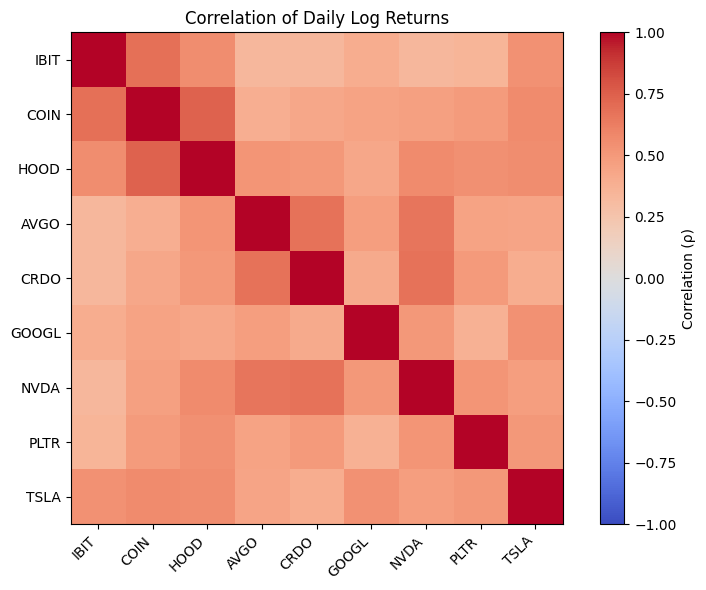

In [1]:
import asyncio

import numpy as np
from matplotlib import pyplot as plt

from backend.position import Position

POSITIONS = [
    ("u", "IBIT"),
    ("u", "COIN"),
    ("u", "HOOD"),
    ("u", "AVGO"),
    ("u", "CRDO"),
    ("u", "GOOGL"),
    ("u", "NVDA"),
    ("u", "PLTR"),
    ("u", "TSLA"),
]
DAYS, TOP_K = 365, 5


async def main():
    labels = [s for _, s in POSITIONS]
    P = np.array(
        [
            p.prices
            for p in await asyncio.gather(*[Position(m, s, DAYS) for m, s in POSITIONS])
        ]
    )
    R = np.log(P[:, 1:] / P[:, :-1])
    C = np.corrcoef(R)

    iu, ju = np.triu_indices_from(C, k=1)
    vals = C[iu, ju]
    order = np.argsort(vals)[::-1]

    i, j = iu[order[0]], ju[order[0]]
    print(f"Most correlated: {labels[i]} & {labels[j]} (ρ = {vals[order[0]]:.3f})")

    print("\nTop pairs:")
    for k in order[:TOP_K]:
        a, b = iu[k], ju[k]
        print(f"- {labels[a]} & {labels[b]} (ρ = {vals[k]:.3f})")

    plt.figure(figsize=(8, 6))
    im = plt.imshow(C, cmap="coolwarm", vmin=-1, vmax=1)
    plt.colorbar(im, label="Correlation (ρ)")
    plt.xticks(range(len(labels)), labels, rotation=45, ha="right")
    plt.yticks(range(len(labels)), labels)
    plt.title("Correlation of Daily Log Returns")
    plt.tight_layout()
    plt.show()


# In Jupyter/IPython:
await main()